# Assignment 3: Predictive analysis - Part 2: Classification
## Group 105
- Natasa Bolic (300241734)
- Brent Palmer (300193610)
## Imports

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
import re

## Introduction

## Dataset Description

**Url:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn <br>
**Name:** Telco Customer Churn <br>
**Author:** The dataset was uploaded to `Kaggle` by a user called `BlastChar`, however `IBM` created the original dataset. <br>
**Purpose:** The `Telco Customer Churn` dataset is a synthetic dataset created by `IBM`. The dataset includes data on 7043 customers of the
fictitious telecommunications company `Telco`. For each customer, data is provided regarding their demographics, their account information, 
and the services they have signed up for. The purpose of the dataset is to use the provided customer data to predict customer churn. A column is provided, 
titled `Churn`, that indicates whether or not the customer left within the last month. Since the churn data is provided, we can easily compare
our classification results against the true values. <br>
**Shape:** There are 7043 rows and 21 columns. (7043, 21)<br>
**Features:** 
- `customerID` (categorical): A unique ID provided to each customer in the form `1234-ABCDE`.
- `gender` (categorical): The gender of the customer (includes `Male` and `Female`).
- `SeniorCitizen` (categorical): Indicates if the customer is a senior.
    - `0`: The customer is not a senior.
    - `1`: The customer is a senior.
- `Partner` (categorical): Indicates if the customer has a partner.
    - `Yes`: The customer has a partner.
    - `No`: The customer does not have a partner. 
- `Dependents` (categorical): Indicates if the customer has dependents.
    - `Yes`: The customer has dependents.
    - `No`: The customer does not have dependents. 
- `tenure` (numerical): The number of months the customer has been with the company [0,72].
- `PhoneService` (categorical): Indicates if the customer has a phone service.
    - `Yes`: The customer has a phone service.
    - `No`: The customer does not have a phone service.
- `MultipleLines` (categorical): Indicates if the customer has multiple lines.
    - `Yes`: The customer has multiple lines.
    - `No`: The customer has one line.
    - `No phone service`: The customer does not have phone service.
- `InternetService` (categorical): The customer's internet connection method.
    - `Fiber optic`: The customer's internet connection uses fiber optic technology.
    - `DSL`: The customer's internet connection uses digital subscriber line (DSL) technology.
    - `No`: The customer does not have internet.
- `OnlineSecurity` (categorical): Indicates if the customer has online security.
    - `Yes`: The customer has online security.
    - `No`: The customer does not have online security.
    - `No internet service`: The customer does not have internet service.
- `OnlineBackup` (categorical): Indicates if the customer has online backup.
    - `Yes`: The customer has online backup.
    - `No`: The customer does not have online backup.
    - `No internet service`: The customer does not have internet service. 
- `DeviceProtection` (categorical): Indicates if the customer has device protection.
    - `Yes`: The customer has device protection.
    - `No`: The customer does not have device protection.
    - `No internet service`: The customer does not have internet service. 
- `TechSupport` (categorical): Indicates if the customer has tech support.
    - `Yes`: The customer has tech support.
    - `No`: The customer does not have tech support.
    - `No internet service`: The customer does not have internet service.
- `StreamingTV` (categorical): Indicates if the customer has streaming TV.
    - `Yes`: The customer has streaming TV.
    - `No`: The customer does not have streaming TV.
    - `No internet service`: The customer does not have internet service.
- `StreamingMovies` (categorical): Indicates if the customer has streaming movies.
    - `Yes`: The customer has streaming movies.
    - `No`: The customer does not have streaming movies.
    - `No internet service`: The customer does not have internet service.
- `Contract` (categorical): The contract term of the customer.
    - `Month-to-month`: The customer pays month-to-month.
    - `One year`: The customer has a one-year contract.
    - `Two year`: The customer has a two-year contract. 
- `PaperlessBilling` (categorical): Indicates if the customer has paperless billing.
    - `Yes`: The customer has paperless billing.
    - `No`: The customer does not have paperless billing.
- `PaymentMethod` (categorical): The customer's payment method.
    - `Electronic check`: The customer pays by electronic check.
    - `Mailed check`: The customer pays by mailed check.
    - `Bank transfer (automatic)`: The customer pays automatically by bank transfer.
    - `Credit card (automatic)`: The customer pays automatically by credit card.
- `MonthlyCharges` (numerical): The amount charged to the customer each month [18.25, 118.75]. 
- `TotalCharges` (numerical): The total amount charged to the customer [0.0, 999.9].
- `Churn` (categorical): Indicates if the customer churned, which means if the customer cancelled their service this month.
    - `Yes`: The customer churned.
    - `No`: The customer did not churn. 

## Loading Data and Basic Exploration

In [2]:
# Read in the dataset from a public repository
url = "https://raw.githubusercontent.com/Natasa127/CSI4142-A3/refs/heads/main/Telco-Customer-Churn.csv"
telco_df = pd.read_csv(url)
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
telco_df.shape

(7043, 21)

## Classification Empirical Study

### (a) Cleaning the data

In this section, we will use the validity checks from `Assignment 2` to determine if the data needs to be cleaned. If needed, an imputation method may be used to clean the data. Note that we will be presenting each of the ten validity checks, although they may be in a different order than in assignment 2. They will be clearly enumerated. Furthermore, in `Assignment 2`, we saved a copy of the invalid rows in our validity checks. In this assignment, we will first check the count of invalid rows; if there are none, we will omit the code that saves a copy, and displays invalid rows. If we find the error count to be non-zero, we will then clean it instead of just saving and displaying the rows.

We have applied every check to every feature that makes sense for that check.

#### Validity Check 1: Exact Duplicates

We will first check for exact duplicates in the dataset. This check verifies that there are no rows that are identical over all columns.

**References:** <br>
Exact Duplicates: https://uottawa.brightspace.com/d2l/le/content/490358/viewContent/6620388/View (Slide 27)

In [5]:
# Exact duplicates check

# Apply the .duplicated method to the DataFrame to create a Series, with exact duplicates set to True
duplicates = telco_df.duplicated()

# Print the number of rows that are exact duplicates
print(f"Number of duplicate rows: {duplicates.sum()}\n")

Number of duplicate rows: 0



Since there are no exact duplicates, no cleaning is required.

#### Validity Check 2: Near Duplicate Errors

In `Assignment 2`, our near duplicate error checker checked if a row differed only by a synonym in a designated attribute. However, when developing our dataset description, we used `.value_counts()` on each categorical attribute, and we noted that there are no synonyms that would cause this error. Thus, we will be using a different type of near duplicate check in this assignment. Instead, we will be checking if any customer's have the exact same information, differing only by their `customerID`.

**References:** <br>
Omit a Column: https://sparkbyexamples.com/pandas/pandas-select-all-columns-except-one-column-in-dataframe/#:~:text=Select%20All%20Except%20One%20Column%20Using%20drop()%20Method%20in,axis%3D1%20or%20columns%20param.

In [6]:
# Near duplicates check

# Apply the .duplcated method to the DataFrame, excluding the customerID column, to create a Series, with exact duplicates of the remaining columns set to True
no_customer_id_duplicates = telco_df.loc[:, telco_df.columns != "customerID"].duplicated()

# Print the number of rows that are near duplicates
print(f"Number of near duplicate rows: {no_customer_id_duplicates.sum()}\n")

Number of near duplicate rows: 22



Since there are 22 near duplicate rows, let us further investigate the actual rows to determine how to handle them.

In [7]:
# Save the invalid rows
invalid_near_duplicate_df = telco_df.loc[no_customer_id_duplicates]

# Display the first 3 rows that are near duplicates
print("Examples of three near duplicate rows:")
invalid_near_duplicate_df.head(3)

Examples of three near duplicate rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,9117-SHLZX,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
1338,1934-SJVJK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,8605-ITULD,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No


We believe that despite our efforts to alter our near duplicate checker to identify rows that vary only by `customerID`, these rows **should not be removed.** There are a few reasons for this:

- There is no row that occurs more than 3 times; in essence, there is no row that occurs a completely unreasonable number of times (there is only one row that occurs three times, and the rest occur twice).
- Given that there are 7043 customers, 22 customers having the same information is plausible. There are a couple reasons why.
    - This is a relatively small portion of the overall sample.
    - Unlike the example in the course slides of near duplicates, we do not have a column like `Name` that would be highly likely to be distinct. All of the columns are reasonably likely to overlap.
        - There are not many options for each column. All of the categorical values only provide a few options, and in many cases the same value would occur across multiple columns (ex: `No internet service` would be shared across 6 columns, so it effectively reduces the number of columns that could be a differentiator). Even the numerical columns are not particularly surprising to overlap—since they represent the prices of services, and presumably `Telco` offers a discrete set of services, the minimal duplication is expected.
    - We analyzed all 22 rows that are duplicates, and the values are values that are logically more likely to be repeated; for example, all the customers had a tenure of 1 month, have a month-to-month plan, no dependents, no partner, were (mostly) not seniors, did not have multiple lines, and most of them do not purchase the internet service. Even of those that did purchase the internet service, none of them had any of the packages creating an unlikely combination. These are all relatively common values, and the internet service specifically reduces the number of differentiating columns. Thus, these users with a common service can only be differentiated by demographic information, their payment methods, and their churn, and it is likely that in some cases this would overlap.
        - As an illustrative example, if there were 15 people with a tenure of exactly 42 months, and had a very specific combination of internet packages, then it would be more likely they were duplicates.
        - To analyze the values of near duplicates, change `invalid_exact_duplicate_df.head(3)` to `invalid_exact_duplicate_df.head(22)`. We have left only 3 examples for brevity.

Thus, we have decided not to remove the rows.

#### Validity Check 3: Format errors

We will use the format check from `Assignment 2` to verify if the `customerID` is in the correct format. The only change necessary is to change the regex to verify that the `customerID` is in the format `1234-ABCDE`. None of the other features have a specific format to follow.

**References:** <br>
Regex Rules: https://www.geeksforgeeks.org/perl-regex-cheat-sheet/

In [8]:
# Format check

# Attribute selection
test_attribute = 'customerID'

# We will fix the regex for the customerID format (1234-ABCDE)
format_regex = r"^\d{4}-[A-Z]{5}$"

# Evaluates a single value against a given regex format
def format_filter(value, format_regex):
    return False if not isinstance(value, str) else bool(re.findall(format_regex, value))

# Apply the function to the test attribute, setting invalid formats to True
invalid_format = telco_df[test_attribute].apply(
    lambda attribute: not format_filter(attribute, format_regex)
)

# Print the number of rows with invalid formatting on the chosen test attribute
print(f"Number of rows where the {test_attribute} value has an invalid format: {invalid_format.sum()}\n")

Number of rows where the customerID value has an invalid format: 0



Since there are no rows with an invalid `customerID` format, no cleaning is required.

#### Validity Check 4: Uniqueness errors

We will use the uniqueness check from `Assignment 2` to validate that the `customerID` values are unique. Minimal changes are necessary to the code. We only need to provide the `customerID` feature name, and change the `sales` DataFrame to `telco_df`. None of the other features are intended to be unique.

In [9]:
# Uniqueness check

# Attribute selection
test_attributes = "customerID"

# Store a series of the counts of each value in the chosen column
attribute_series_counts = telco_df[test_attribute].value_counts()

# Evaluates a single value, checking if it is unique in the chosen column
def uniqueness_filter(value, counts):
    if pd.isna(value):
        return False
    if counts[value] == 1:
        return True
    return False

# Apply the function to the test attribute, setting rows with non-unique values in the designated column to True
invalid_uniqueness = telco_df[test_attribute].apply(
    lambda attribute: not uniqueness_filter(attribute, attribute_series_counts)
)

# Print the number of rows with a value that is not unique in the chosen column
print(f"Number of rows where the {test_attribute} value is not unique: {invalid_uniqueness.sum()}\n")

Number of rows where the customerID value is not unique: 0



Since every `customerID` is unique, no cleaning is required.

#### Validity Check 5: Presence check

We will use the presence check from `Assignment 2` to validate that there is no missing information in any of the columns. Minimal changes are necessary to the code. Instead of taking a parameter input, we will simply iterate over all of the columns to determine if any of them are missing values. We also added a check for strings of whitespace.

In [10]:
# Presence check

# Iterate over each column and perform the presence check on each
for column in telco_df:
    # Apply pd.isna() to the test attribute, or check if it is a string of whitespace, setting rows with missing values in the designated column to True
    invalid_presence = telco_df[column].apply(lambda attribute: (pd.isna(attribute) or (isinstance(attribute, str) and attribute.strip() == "")))

    # Print the number of rows with a missing value in the chosen test attribute
    print(f"Number of rows where the {column} value is missing: {invalid_presence.sum()}")

Number of rows where the customerID value is missing: 0
Number of rows where the gender value is missing: 0
Number of rows where the SeniorCitizen value is missing: 0
Number of rows where the Partner value is missing: 0
Number of rows where the Dependents value is missing: 0
Number of rows where the tenure value is missing: 0
Number of rows where the PhoneService value is missing: 0
Number of rows where the MultipleLines value is missing: 0
Number of rows where the InternetService value is missing: 0
Number of rows where the OnlineSecurity value is missing: 0
Number of rows where the OnlineBackup value is missing: 0
Number of rows where the DeviceProtection value is missing: 0
Number of rows where the TechSupport value is missing: 0
Number of rows where the StreamingTV value is missing: 0
Number of rows where the StreamingMovies value is missing: 0
Number of rows where the Contract value is missing: 0
Number of rows where the PaperlessBilling value is missing: 0
Number of rows where th

There are only missing values in the `TotalCharges` feature. We will investigate this further, first by printing out some examples of invalid rows.

In [11]:
# Extract the rows with a missing TotalCharges
invalid_presence = telco_df["TotalCharges"].apply(lambda attribute: (pd.isna(attribute) or (isinstance(attribute, str) and attribute.strip() == "")))

# Save the invalid rows
invalid_presence_df = telco_df.loc[invalid_presence]

# Display the first 3 rows with a missing value
print(f"Examples of three rows where the TotalCharges value is missing:")
invalid_presence_df.head(3)

Examples of three rows where the TotalCharges value is missing:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No


Note that all of the rows that are missing a `TotalCharges` value have a `tenure` of 0. This makes sense; since this is the customer's first month, they have not been charged yet.

In [12]:
telco_df["tenure"].value_counts()[0]

np.int64(11)

There are 11 customers with a `tenure` of zero, corresponding to the number of customers with a missing `TotalCharges` value. Thus, this must be the reason. Let us replace the missing values with a value of 0, as from a logical standpoint, these customers have been charged $0 so far. We will make this change in a copy of the dataset called `cleaned_telco_df`. Any subsequent cleaning will be done using this dataset.

In [13]:
cleaned_telco_df = telco_df.copy()
cleaned_telco_df.loc[cleaned_telco_df["tenure"] == 0, "TotalCharges"] = 0

# Extract the rows with a missing TotalCharges
invalid_presence = cleaned_telco_df["TotalCharges"].apply(lambda attribute: (pd.isna(attribute) or (isinstance(attribute, str) and attribute.strip() == "")))

# Verify that there are no longer missing values
print(f"Number of rows where the TotalCharges value is missing: {invalid_presence.sum()}")

Number of rows where the TotalCharges value is missing: 0


Now, we have solved the presence error problem by imputing the value of 0 in `cleaned_telco_df`, which is done since the missing values correspond to customers who have not been charged yet.

#### Validity Check 6: Look-up Check

We will use the look-up check from `Assignment 2` to validate that select features' values exist in a corresponding pre-defined finite set of values. Minimal changes are necessary to the code. Instead of taking a parameter input, we define a dictionary containing the relevant features as the keys, and their respective look-up tables as values. Then, we iterate over all of these features and check if their values are included in their look-up tables.

In [14]:
# Look-up check

# Dictionary containing every feature's look-up table of valid values
look_up_dict = {
    "gender": ["Male", "Female"],
    "SeniorCitizen": [0, 1],
    "Partner": ["Yes", "No"],
    "Dependents": ["Yes", "No"],
    "PhoneService": ["Yes", "No"],
    "MultipleLines": ["Yes", "No", "No phone service"],
    "InternetService": ["Fiber optic", "DSL", "No"],
    "OnlineSecurity": ["Yes", "No", "No internet service"],
    "OnlineBackup": ["Yes", "No", "No internet service"],
    "DeviceProtection": ["Yes", "No", "No internet service"],
    "TechSupport": ["Yes", "No", "No internet service"],
    "StreamingTV": ["Yes", "No", "No internet service"],
    "StreamingMovies": ["Yes", "No", "No internet service"],
    "Contract": ["Month-to-month", "One year", "Two year"],
    "PaperlessBilling": ["Yes", "No"],
    "PaymentMethod": ["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"],
    "Churn": ["Yes", "No"]
}

# Checks if a single value is in the look-up table
def look_up_filter(value, look_up_table):
    return value in look_up_table

# Apply the function to every feature, setting rows whose value is not in the look-up table to True
for feature in look_up_dict.keys():
    invalid_look_up = cleaned_telco_df[feature].apply(
        lambda attribute: not look_up_filter(attribute, look_up_dict[feature])
    )
    # Print the number of rows with a value that is not in the look-up table for the designated attribute
    print(f"Number of rows where the {feature} value is not in the look-up table: {invalid_look_up.sum()}")

Number of rows where the gender value is not in the look-up table: 0
Number of rows where the SeniorCitizen value is not in the look-up table: 0
Number of rows where the Partner value is not in the look-up table: 0
Number of rows where the Dependents value is not in the look-up table: 0
Number of rows where the PhoneService value is not in the look-up table: 0
Number of rows where the MultipleLines value is not in the look-up table: 0
Number of rows where the InternetService value is not in the look-up table: 0
Number of rows where the OnlineSecurity value is not in the look-up table: 0
Number of rows where the OnlineBackup value is not in the look-up table: 0
Number of rows where the DeviceProtection value is not in the look-up table: 0
Number of rows where the TechSupport value is not in the look-up table: 0
Number of rows where the StreamingTV value is not in the look-up table: 0
Number of rows where the StreamingMovies value is not in the look-up table: 0
Number of rows where the C

Since none of the features have a row with a value not in the corresponding look-up table, no cleaning is required.

#### Validity Check 7: Consistency Check

We will use the consistency check from `Assignment 2` to validate that data in a row follows some designated rule that involves multiple columns. Minimal changes are necessary to the code. We simply specify an array of two different rules we want to apply to our dataset, and iterate over them to perform the validation. There are three consistency checks that make sense for this dataset:
1. If a user does not have the phone service (value of `No` for `PhoneService`), then they must have a value of `No phone service` in the `MultipleLines` feature. Conversely, those with phone service (value of `Yes` for `PhoneService`) must not have a value of `No phone service` in the `MultipleLines` feature.
2. If a user does not have the internet service (values of `No` for `InternetService`), then they must have a value of `No internet service` in the `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies` features. Conversely, those with the internet service (value of `Fiber optic` or `DSL` for `InternetService`) must not have a value of `No internet service` in the `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies` features.
3. If a user has a `tenure` of `0`, then their `TotalCharges` must be `0`. Otherwise, their `TotalCharges` must be greater than `0`.

**References:** <br>
Eval: https://docs.python.org/3/library/functions.html#eval

In [15]:
# Consistency check

# An array containing the three rules described above
rules = [
    (
        '(row["InternetService"] == "No" and row["OnlineSecurity"] == row["OnlineBackup"] == row["DeviceProtection"]' 
        '== row["TechSupport"] == row["StreamingTV"] == row["StreamingMovies"] == "No internet service") or '
        '(row["InternetService"] in ["Fiber optic", "DSL"] and row["OnlineSecurity"] in ["Yes", "No"] and '
        'row["OnlineBackup"] in ["Yes", "No"] and row["DeviceProtection"] in ["Yes", "No"] and row["TechSupport"] in ["Yes", "No"] and '
        'row["StreamingTV"] in ["Yes", "No"] and row["StreamingMovies"] in ["Yes", "No"])'
    ),
    '(row["PhoneService"] == "No" and row["MultipleLines"] == "No phone service") or (row["PhoneService"] == "Yes" and row["MultipleLines"] in ["Yes", "No"])',
    '(row["tenure"] == 0 and row["TotalCharges"] == 0) or (row["tenure"] > 0 and row["TotalCharges"] > 0)'
]

# Evalutes a single row against a given rule
def consistency_filter(row, rule):
    try:
        # Convert the row to a dictionary, since eval() can use a dictionary
        row = row.to_dict()

        # Convert the numeric attributes to float to allow for expression evaluation
        for key, value in row.items():
            try:
                row[key] = float(value)
            except Exception as e:
                pass

        # Return the result of the expression
        return eval(rule)
    except Exception as e:
        # If the eval fails (for example, 2.0 * "error" will throw an error), return False
        return False

# Validate each rule
for rule in rules:
    # Apply the function to each row, setting inconsistent rows to True
    invalid_consistency = cleaned_telco_df.apply(
        lambda row: not consistency_filter(row, rule),
        axis=1
    )
    
    # Print the number of inconsistent rows based on the provided rule
    print(f"Number of rows where the rule {rule} is invalid: {invalid_consistency.sum()}\n")

Number of rows where the rule (row["InternetService"] == "No" and row["OnlineSecurity"] == row["OnlineBackup"] == row["DeviceProtection"]== row["TechSupport"] == row["StreamingTV"] == row["StreamingMovies"] == "No internet service") or (row["InternetService"] in ["Fiber optic", "DSL"] and row["OnlineSecurity"] in ["Yes", "No"] and row["OnlineBackup"] in ["Yes", "No"] and row["DeviceProtection"] in ["Yes", "No"] and row["TechSupport"] in ["Yes", "No"] and row["StreamingTV"] in ["Yes", "No"] and row["StreamingMovies"] in ["Yes", "No"]) is invalid: 0

Number of rows where the rule (row["PhoneService"] == "No" and row["MultipleLines"] == "No phone service") or (row["PhoneService"] == "Yes" and row["MultipleLines"] in ["Yes", "No"]) is invalid: 0

Number of rows where the rule (row["tenure"] == 0 and row["TotalCharges"] == 0) or (row["tenure"] > 0 and row["TotalCharges"] > 0) is invalid: 0



Since none of the rows are inconsistent for any of the rules, no cleaning is required.

#### Validity Check 8: Data Type Check

We will use the data type check from `Assignment 2` to validate that the data stored is the correct data type. We can apply this to every column. We will use our method 1 from `Assignment 2`, which simply checks if the data in its current format has the desired data type. Minimal changes are necessary to the code. We simply specify a dictionary, where the keys are the features, and the values are the desired data types. We iterate over each feature in the dictionary, applying the data type check to each.

In [16]:
# Data type check

# Evalutes a single value's data type against the desired data type
def type_filter_method1(value, test_datatype):
    if pd.isna(value):
        return False
    return isinstance(value, test_datatype)

# Create a dictionary that maps each attribute to its correct datatype
data_type_dict = {
    "customerID": str,
    "gender": str,
    "SeniorCitizen": int,
    "Partner": str,
    "Dependents": str,
    "tenure": int,
    "PhoneService": str,
    "MultipleLines": str,
    "InternetService": str,
    "OnlineSecurity": str,
    "OnlineBackup": str,
    "DeviceProtection": str,
    "TechSupport": str,
    "StreamingTV": str,
    "StreamingMovies": str,
    "Contract": str,
    "PaperlessBilling": str,
    "PaymentMethod": str,
    "MonthlyCharges": float,
    "TotalCharges": float,
    "Churn": str
}

# Apply the function to every feature, setting rows whose value is not stored as the correct datatype to True
for feature in data_type_dict.keys():
    invalid_datatype = cleaned_telco_df[feature].apply(
        lambda attribute: not type_filter_method1(attribute, data_type_dict[feature])
    )
    # Print the number of rows with a value that is not stored as the correct datatype for the designated attribute
    print(f"Number of rows where the {feature} value is not stored as the correct datatype ({data_type_dict[feature]}): {invalid_datatype.sum()}")

Number of rows where the customerID value is not stored as the correct datatype (<class 'str'>): 0
Number of rows where the gender value is not stored as the correct datatype (<class 'str'>): 0
Number of rows where the SeniorCitizen value is not stored as the correct datatype (<class 'int'>): 0
Number of rows where the Partner value is not stored as the correct datatype (<class 'str'>): 0
Number of rows where the Dependents value is not stored as the correct datatype (<class 'str'>): 0
Number of rows where the tenure value is not stored as the correct datatype (<class 'int'>): 0
Number of rows where the PhoneService value is not stored as the correct datatype (<class 'str'>): 0
Number of rows where the MultipleLines value is not stored as the correct datatype (<class 'str'>): 0
Number of rows where the InternetService value is not stored as the correct datatype (<class 'str'>): 0
Number of rows where the OnlineSecurity value is not stored as the correct datatype (<class 'str'>): 0
Numb

The only feature with an issue is `TotalCharges`. It should be stored as a `float`, but it is stored as an `object`. This is expected, as we noted earlier that the 11 customer's that had a `tenure` of `0` were initially stored as empty strings instead of `0`. Since we have already converted the empty strings to `0`, we can simply cast the values to the `float` datatype, since the `objects` hold `float` values.

**References:** <br>
Cast a Column: https://stackoverflow.com/questions/48094854/pandas-convert-data-type-from-object-to-float

In [17]:
# Cast the TotalCharges feature to the float data type
cleaned_telco_df["TotalCharges"] = cleaned_telco_df.TotalCharges.astype(float)

# Rerun the validity check to verify the cleaning worked.

invalid_datatype = cleaned_telco_df["TotalCharges"].apply(
    lambda attribute: not type_filter_method1(attribute, float)
)

# Print the number of rows with a value that is not stored as the correct datatype for the designated attribute
print(f"Number of rows where the TotalCharges value is not stored as the correct datatype (float): {invalid_datatype.sum()}")

Number of rows where the TotalCharges value is not stored as the correct datatype (float): 0


Now, we have solved the data type error problem by casting the `TotalCharges` column to `float` in cleaned_telco_df. The dataset has now been cleaned for the data type check.

#### Validity Check 9: Length Check

We will use the length check from `Assignment 2` to validate that the length of the categorical values is within a designated range. Minimal changes are necessary to the code. Instead of taking a parameter input, we define a dictionary containing the relevant features as the keys, and their respective minimum and maximum lengths as values (stored as a tuple, (`min`, `max`)). Then, we iterate over all of these features and check if their length values are within the designated range.

Our minimum and maximum length values are based on the minimum and maximum lengths of the valid values. For example, for `Partner`, the valid values are `Yes` and `No`, so we have set the minimum valid length to `2` and the maximum valid length to `3` accordingly.

In [18]:
# Length check

# Dictionary containing every feature's minimum and maximum valid lengths
length_dict = {
    "customerID": (10, 10), # All customerIDs are exactly 10 characters
    "gender": (4, 6), # Male, Female
    "Partner": (2, 3), # No, Yes
    "Dependents": (2, 3), # No, Yes
    "PhoneService": (2, 3), # No, Yes
    "MultipleLines": (2, 16), # No, No phone service
    "InternetService": (2, 11), # No, Fiber optic
    "OnlineSecurity": (2, 19), # No, No internet service
    "OnlineBackup": (2, 19), # No, No internet service
    "DeviceProtection": (2, 19), # No, No internet service
    "TechSupport": (2, 19), # No, No internet service
    "StreamingTV": (2, 19), # No, No internet service
    "StreamingMovies": (2, 19), # No, No internet service
    "Contract": (8, 14), # One year, Month-to-month
    "PaperlessBilling": (2, 3), # No, Yes
    "PaymentMethod": (12, 25), # Mailed check, Bank transfer (automatic)
    "Churn": (2, 3) # No, Yes
}

# Evaluates a single value's length against the given valid range of lengths
def length_filter(value, minimum_length, maximum_length):
    if pd.isna(value) or not isinstance(value, str):
        return False
    return minimum_length <= len(value) <= maximum_length

# Apply the function to every feature in the dictionary, setting invalid length values to True
for feature in length_dict.keys():
    # Apply the function to the test attribute, setting out of range length values to True
    invalid_length = cleaned_telco_df[feature].apply(
        lambda attribute: not length_filter(attribute, length_dict[feature][0], length_dict[feature][1])
    )

    # Print the number of rows with a length value outside of the given valid length range for the designated attribute
    print(f"Number of rows where the {feature} value's length is outside of the defined range of valid lengths {length_dict[feature]}: {invalid_length.sum()}")


Number of rows where the customerID value's length is outside of the defined range of valid lengths (10, 10): 0
Number of rows where the gender value's length is outside of the defined range of valid lengths (4, 6): 0
Number of rows where the Partner value's length is outside of the defined range of valid lengths (2, 3): 0
Number of rows where the Dependents value's length is outside of the defined range of valid lengths (2, 3): 0
Number of rows where the PhoneService value's length is outside of the defined range of valid lengths (2, 3): 0
Number of rows where the MultipleLines value's length is outside of the defined range of valid lengths (2, 16): 0
Number of rows where the InternetService value's length is outside of the defined range of valid lengths (2, 11): 0
Number of rows where the OnlineSecurity value's length is outside of the defined range of valid lengths (2, 19): 0
Number of rows where the OnlineBackup value's length is outside of the defined range of valid lengths (2, 19

Since none of the values fail the length check, no cleaning is required.

#### Validity Check 10: Range Check

We will use the range check from `Assignment 2` to validate that the values of the numerical values are within the minimum and maximum acceptable values. Minimal changes are necessary to the code. Instead of taking a parameter input, we define a dictionary containing the relevant features as the keys, and their respective minimum and maximum values as values (stored as a tuple, (`min`, `max`)). Then, we iterate over all of these features and check if their values are within the designated range.

The following is a rationale for each of the ranges provided:
- `tenure` [0, 900]: `Telco` is a fictitious company, so there is no real founding date. Let us suppose that `Telco` is a legacy telecommunications company, established in 1950. Then, the maximum `tenure` possible would be `900` months. A `tenure` cannot be negative, so the minimum is `0`, representing customers in their first month of service.
- `MonthlyCharges` [5, 297]: Since `Telco` is a fictious company, there is not a set of services that can be checked to determine minimum and maximum values. From some industry research, we found a company that offers a home phone service for `5` dollars, so we will set the minimum monthly charge to `5` dollars. We are setting the maximum based on Bell's current maximum home phone price plus Bell's maximum internet service price, which is (`137` (Home Phone with Five Lines) + `160` (Gigabit Fibe 8.0)). Technically customers could buy more than five phone lines, but this estimate should be sufficient for this assignment.
- `TotalCharges` [0, 267300]: The minimum `TotalCharges` is the minimum `tenure` multiplied by the minimum `MonthlyCharges`, which is `0` due to a possible `tenure` of `0`. The maximum `TotalCharges` is based on the maximum `tenure` multiplied by the maximum `MonthlyCharges`, which is `267300`.

**References:** <br>
5-dollar Home Phone: https://www.fongo.com/services/fongo-home-phone/ <br>
Bell Pricing: https://www.bell.ca/

In [19]:
# Range check

# Dictionary containing every feature's minimum and maximum valid values
range_dict = {
    "tenure": (0, 900),
    "MonthlyCharges": (5, 297),
    "TotalCharges": (0, 267300)
}

# Evaluates a single value against a given range
def range_filter(value, minimum, maximum):
    try:
        value = float(value)
    except Exception as e:
        return False
    return minimum <= value <= maximum

# Apply the function to every feature in the dictionary, setting out of range values to True
for feature in range_dict.keys():
    invalid_range = cleaned_telco_df[feature].apply(
        lambda attribute: not range_filter(attribute, range_dict[feature][0], range_dict[feature][1])
    )
    # Print the number of rows with a value that is not stored as the correct datatype for the designated attribute
    print(f"Number of rows where the {feature} value is not in the correct range {range_dict[feature]}: {invalid_range.sum()}")

Number of rows where the tenure value is not in the correct range (0, 900): 0
Number of rows where the MonthlyCharges value is not in the correct range (5, 297): 0
Number of rows where the TotalCharges value is not in the correct range (0, 267300): 0


Since none of the values fail the range check, no cleaning is required.

### (b) Numerical Feature Encoding

Decision trees can benefit from binning numerical features. Our professor often references `Samy Baladram` articles in our lecture notes, so we will be following his guide to discretization, linked in our references. There are two methods he mentions in this article that we will use:

**1. Equal-Frequency-Binning (Quantile Binning):** This approach creates bins that contain roughly the same number of observations, which is good when you want to make sure the representation of data is balanced. This ensures decision boundaries are meaningful. <br>
**2. Custom Binning:** This approach allows you to create bins based on domain knowledge. In our case this is useful because we can group `tenure` by the number of years, a logical representation.

We will bin the three numerical features as follows:
- `tenure`: We will use **custom binning** for tenure, as a logical way to bin `tenure` is based on the number of years the customer has been with the company. We will divide `tenure` into 3 bins. Note that we chose these bin ranges, as they provide a roughly even distribution of the data, so we are still roughly adhering to **equal-frequency-binning** as well.
    - `Short`: The customer has been with the company for under 12 months. (`2069` customers)
    - `Medium`: The customer has been with the company between 12 and 48 months. (`2671` customers)
    - `Long`: The customer has been with the company for more than 48 months. (`2303` customers)
- `MonthlyCharges`: There is not a logical custom way to bin the monthly charges, so we will simply bin based on quantile, which uses the **Quantile Binning** approach. We will divide `MonthlyCharges` into 3 bins, based on their tertile.
    - `Low`: The customer's `MonthlyCharges` value is in the first tertile.
    - `Medium`: The customer's `MonthlyCharges` value is in the second tertile.
    - `High`: The customer's `MonthlyCharges` value is in the third tertile.
- `TotalCharges`: There is not a logical custom way to bin the total charges, so we will simply bin based on quantile, which uses the **Quantile Binning** approach. We will divide `TotalCharges` into 3 bins, based on their tertile.
    - `Low`: The customer's `TotalCharges` value is in the first tertile.
    - `Medium`: The customer's `TotalCharges` value is in the second tertile.
    - `High`: The customer's `TotalCharges` value is in the third tertile.

We make a copy of the DataFrame where we store the binned data. We do not replace the numerical data, as it will be used later for outlier removal and feature extraction. Thus, new features are created for the binned data, called `binned_tenure`, `binned_MonthlyCharges`, and `binned_TotalCharges` respectively. The original numerical data will be dropped after feature extraction, before the model training.

**References:** <br>
Binning Techniques: https://medium.com/towards-data-science/discretization-explained-a-visual-guide-with-code-examples-for-beginners-f056af9102fa <br>
Using qcut for Quantile Binning: https://pbpython.com/pandas-qcut-cut.html

In [20]:
# Binning

# Create a copy of the DataFrame that will store binned data
binned_telco_df = cleaned_telco_df.copy()

# Bin the tenure of a customer
def bin_tenure(tenure):
    # If the customer has been with Telco for less than a year, then their tenure is relatively short in length
    if tenure < 12:
        return "Short"
    # If the customer has been with Telco between one and four years, then their tenure is relatively medium in length
    elif tenure < 48:
        return "Medium"
    # If the customer has been with Telco for four or more years, then their tenure is relatively long in length
    return "Long"

# Apply the bin_tenure function to bin the tenure feature
binned_telco_df["binned_tenure"] = binned_telco_df["tenure"].apply(bin_tenure)

# Check the distribution, since this is custom logic
print(f"{binned_telco_df['binned_tenure'].value_counts()} \n")

# Create labels for the MonthlyCharges and TotalCharges bins
bin_labels = ["Low", "Medium", "High"]

# Bin the MonthlyCharges based on tertile
binned_telco_df["binned_MonthlyCharges"] = pd.qcut(binned_telco_df["MonthlyCharges"], q=3, labels=bin_labels)

# Verify the distribution
print(f"{binned_telco_df['binned_MonthlyCharges'].value_counts()} \n")

# Bin the TotalCharges based on tertile
binned_telco_df["binned_TotalCharges"] = pd.qcut(binned_telco_df["TotalCharges"], q=3, labels=bin_labels)

# Verify the distribution
print(f"{binned_telco_df["binned_TotalCharges"].value_counts()} \n")

# Show the first three rows of the binned DataFrame
print("The first three rows of the binned DataFrame:")
binned_telco_df.head(3)

binned_tenure
Medium    2671
Long      2303
Short     2069
Name: count, dtype: int64 

binned_MonthlyCharges
Low       2351
High      2347
Medium    2345
Name: count, dtype: int64 

binned_TotalCharges
Low       2348
High      2348
Medium    2347
Name: count, dtype: int64 

The first three rows of the binned DataFrame:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,binned_tenure,binned_MonthlyCharges,binned_TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Short,Low,Low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,Medium,Medium,Medium
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Short,Medium,Low


Thus, we have successfully binned our numerical features into roughly even-sized categories.

#### Categorical Feature Encoding

As noted in `part d`, when exploring the `DecisionTreeClassifier` in `scikit-learn`, we discovered that it **does not support categorical variables**. Therefore, we will now encode our categorical variables using one-hot encoding to be able to train on them. We will add the encoded features in addition to the categorical features, because the categorical features are still used in the our EDA, outlier detection, and feature extraction sections. We will only remove them from the training sets immediately before running the actual DecisionTreeClassifier method in part f of the assignment. For the test set, they can be safely removed right after the split.
 
We also drop the `customerID` feature at this point, because it does not help with classification.

**References:**<br>
One-hot encoding: https://www.geeksforgeeks.org/ml-one-hot-encoding/ <br>
Drop a column: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [21]:
# Drop the customerID feature, since it will not help with classification.
binned_telco_df = binned_telco_df.drop("customerID", axis = 1)

# Confirm it dropped
binned_telco_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,binned_tenure,binned_MonthlyCharges,binned_TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Short,Low,Low
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,Medium,Medium,Medium
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Short,Medium,Low


In [22]:
# Categorical feature encoding

# List of categorical features to encode
categorical_features = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", 
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", 
    "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn",
    "binned_tenure", "binned_MonthlyCharges", "binned_TotalCharges"
]

# Apply one-hot encoding to the categorical features
encoded_telco_df = pd.get_dummies(binned_telco_df, columns=categorical_features)

# Add the original categorical features back in for EDA, outlier detection, and feature extraction
for feature in categorical_features:
    encoded_telco_df[feature] = binned_telco_df[feature]

# Ensure the encoding worked as intended
print(f"{encoded_telco_df.columns}\n")
print("Example rows from the new encoded DataFrame:")
encoded_telco_df.head(3)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       '

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,binned_tenure,binned_MonthlyCharges,binned_TotalCharges
0,1,29.85,29.85,True,False,True,False,False,True,True,...,No,No,No,Month-to-month,Yes,Electronic check,No,Short,Low,Low
1,34,56.95,1889.50,False,True,True,False,True,False,True,...,No,No,No,One year,No,Mailed check,No,Medium,Medium,Medium
2,2,53.85,108.15,False,True,True,False,True,False,True,...,No,No,No,Month-to-month,Yes,Mailed check,Yes,Short,Medium,Low


### (f) Empirical Study

We are only doing part a of the empirical study here, as it must precede the other sections of the assignment, as per the professor's announcement.

#### Test and Train Set Split

Before moving on to parts c through e, we must do the first step of part f—splitting the data into a training set and a test set. This is important, as we do not want to remove outliers from or add features to the test set. We should only be modifying the training set. We will perform the split on the encoded DataFrame.

We split the data such that 80% is used for the training set, and the remaining 20% is reserved as the test set. As mentioned above, the modifications done to the data to train different versions of the model (outlier removal and feature extraction) will only be done on the training sets. After making the modifications to the training data, we will perform 4-fold cross-validation on the modified training sets. This involves creating 4 validation sets from the modified training sets. Ultimately, we do not separate a validation set in this step, as specified by the professor.

**References:** <br>
Train Test Split: https://www.statology.org/pandas-train-test/

In [23]:
# Split the DataFrame into training set and test set
train_telco_df, test_telco_df = train_test_split(encoded_telco_df, test_size=0.2, random_state=0)

# Show that the DataFrame split properly
print(f"The number of rows in the training set is {len(train_telco_df)}, which is {round(100*len(train_telco_df)/len(encoded_telco_df))}% of the data.")
print(f"The number of rows in the test set is {len(test_telco_df)}, which is {round(100*len(test_telco_df)/len(encoded_telco_df))}% of the data.\n")

# Show some example rows of the training set
print(f"Example rows of the training set: ")
train_telco_df.head(3)

The number of rows in the training set is 5634, which is 80% of the data.
The number of rows in the test set is 1409, which is 20% of the data.

Example rows of the training set: 


,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,binned_tenure,binned_MonthlyCharges,binned_TotalCharges
2920,72,85.10,6155.40,True,False,True,False,False,True,True,...,Yes,Yes,Yes,Two year,No,Mailed check,No,Long,High,High
2966,14,46.35,672.70,True,False,False,True,True,False,True,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,No,Medium,Low,Low
6099,71,24.70,1810.55,True,False,True,False,False,True,False,...,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),No,Long,Low,Medium


We can also remove the original numerical and categorical columns from the test set, as they are no longer needed. Then, we can show three example rows for the test set as well.

In [24]:
# List of features to remove from the test set
features_to_remove = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", 
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", 
    "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn",
    "binned_tenure", "binned_MonthlyCharges", "binned_TotalCharges", "tenure", "MonthlyCharges",
    "TotalCharges"
]

# Remove the features from the test set
test_telco_df = test_telco_df.drop(features_to_remove, axis = 1)

# Ensure the removal worked as intended
print(f"{test_telco_df.columns}\n")
print("Example rows from the new test set:")
test_telco_df.head(3)

Index(['gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'Paperle

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Churn_Yes,binned_tenure_Long,binned_tenure_Medium,binned_tenure_Short,binned_MonthlyCharges_Low,binned_MonthlyCharges_Medium,binned_MonthlyCharges_High,binned_TotalCharges_Low,binned_TotalCharges_Medium,binned_TotalCharges_High
2200,True,False,True,False,True,False,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False
4627,False,True,True,False,True,False,True,False,False,True,...,False,True,False,False,False,False,True,False,False,True
3225,True,False,True,False,True,False,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False


We have successfully removed the unnecessary columns from the test set.

Now that the data is succesfully partitioned into a training set and a test set, we will set aside the test set. Moving forwards, our EDA, outlier detection and removal, and feature extraction will be exclusively performed on the training set, `train_telco_df`.

### (c) EDA and Outlier Detection

#### Program LOF for Outlier Detection

We will be using the built-in `LocalOutlierFactor` function from `scikit-learn`, which the professor confirmed is acceptable for this assignment.


#### Outlier Detection for Categorical Features

Outlier detection is generally done on numerical features. Furthermore, LOF can only be used on numerical features. Thus, categorical variables do not necessarily need to be checked for outliers in this assignment. However, we will still precede our numerical outlier analysis with a brief consideration of categorical features. To do so, we will print the value counts of the categories for each categorical feature, since it is simple to implement, and it is useful verify there are no categories that are minimally represented.

In [25]:
# Categorical Feature Outlier Detection

# List of categorical features
categorical_features = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", 
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", 
    "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"
]

for feature in categorical_features:
    print(f"{train_telco_df[feature].value_counts()}\n")

gender
Female    2817
Male      2817
Name: count, dtype: int64

SeniorCitizen
0    4721
1     913
Name: count, dtype: int64

Partner
No     2907
Yes    2727
Name: count, dtype: int64

Dependents
No     3949
Yes    1685
Name: count, dtype: int64

PhoneService
Yes    5092
No      542
Name: count, dtype: int64

MultipleLines
No                  2720
Yes                 2372
No phone service     542
Name: count, dtype: int64

InternetService
Fiber optic    2486
DSL            1926
No             1222
Name: count, dtype: int64

OnlineSecurity
No                     2793
Yes                    1619
No internet service    1222
Name: count, dtype: int64

OnlineBackup
No                     2461
Yes                    1951
No internet service    1222
Name: count, dtype: int64

DeviceProtection
No                     2472
Yes                    1940
No internet service    1222
Name: count, dtype: int64

TechSupport
No                     2802
Yes                    1610
No internet service    12

Clearly, none of the categories have an unreasonably low count, so there are no outliers in the categorical features. Now we may proceed with the EDA and outlier detection of numerical features, the focal point of the outlier detection in this assignment.

#### Outlier Detection for Numerical Features

The focus of outlier detection in this assignment is on detecting outliers in the numerical features. There are three numerical features in this dataset, including `tenure`, `MonthlyCharges`, and `TotalCharges`.

##### Exploratory Data Analysis

Since LOF is computationally costly, we will first use EDA to visualize the three numerical features to determine which feature to use LOF on. We will use histograms to and boxplots to visualize the distribution of the data. First, we create a histogram to visualize the distribution of `tenure` values. We use the Freedman-Diaconis rule to determine the optimal number of bins for all the histograms. Note that we must use the original numerical values to generate new bins for the histograms, as the previously binned data uses quantile binning—that would not be useful for analyzing the distribution of the data.

**References:** <br>
Freedman-Diaconis: https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram <br>
Gridlines: https://www.w3schools.com/python/matplotlib_grid.asp <br>
Histplot: https://seaborn.pydata.org/generated/seaborn.histplot.html <br>
Boxplot: https://seaborn.pydata.org/generated/seaborn.boxplot.html

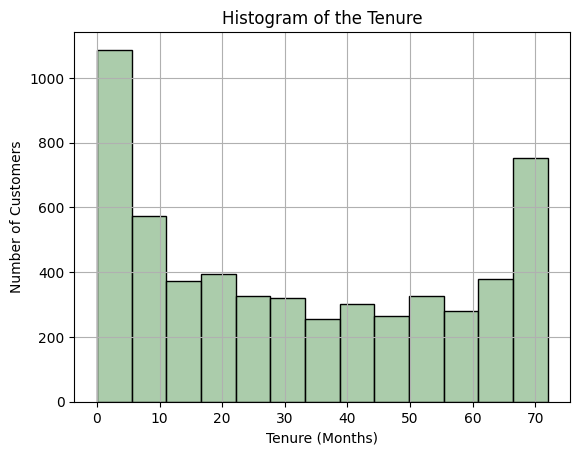

In [26]:
# Visualize the tenure distribution

# Use Freedman-Diaconis rule to determine number of bins
x_axis = "tenure"
iqr = np.percentile(train_telco_df[x_axis], 75) - np.percentile(train_telco_df[x_axis], 25)
bin_width = 2 * iqr / (len(train_telco_df[x_axis]) ** (1/3))
num_bins = int((train_telco_df[x_axis].max() - train_telco_df[x_axis].min()) / bin_width)

# Create the histogram of tenure
sns.histplot(data=train_telco_df, x=x_axis, bins=num_bins, color="darkseagreen")

# Label the histogram
plt.xlabel(x_axis.title() + " (Months)")
plt.ylabel('Number of Customers')
plt.title('Histogram of the ' + x_axis.title())
plt.grid()

# Display plot
plt.show()

There are clearly no outliers in the `tenure` data. The values are distributed relatively evenly; there are no extreme values that are isolated. The large counts of low and high `tenure` appear to be natural, as they represent new customers and very old customers respectively; if the company is about 72 months old, it would make sense that there is a large count of people who joined at the same time when the company was first founded. Another EDA method to determine if there are outliers is to use a boxplot. The boxplot will use the IQR to help visualize outliers. The whiskers occur at `Q1 - 1.5 * IQR`, and `Q3 + 1.5 * IQR`. Any values below the first whisker or above the second whisker are considered outliers, and are marked with dots on the plot. We will now create a boxplot for the `tenure` feature.

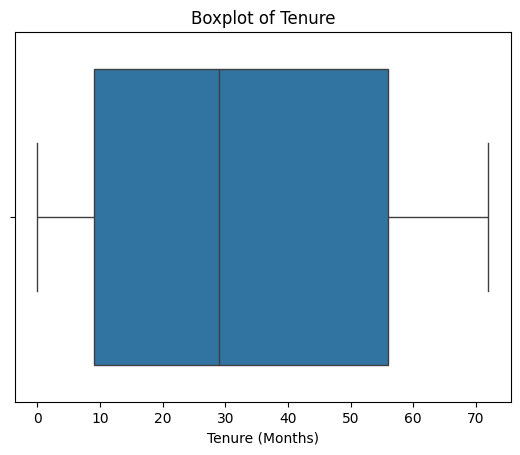

In [27]:
# Create a boxplot for Tenure
sns.boxplot(x=train_telco_df["tenure"])
plt.title("Boxplot of Tenure")
plt.xlabel("Tenure (Months)")
plt.show()

All of the values are contained within the whiskers, so there are no outliers in the `tenure` feature. This supports our previous analysis of the histogram. We move on to visualizing `MonthlyCharges` with a histogram next.

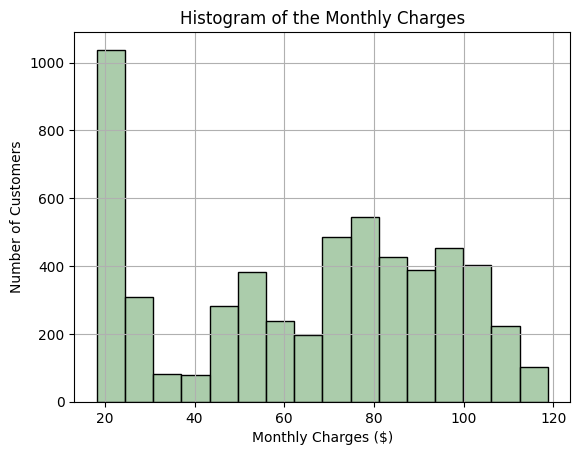

In [28]:
# Visualize the MonthlyCharges distribution

# Use Freedman-Diaconis rule to determine number of bins
x_axis = "MonthlyCharges"
iqr = np.percentile(train_telco_df[x_axis], 75) - np.percentile(train_telco_df[x_axis], 25)
bin_width = 2 * iqr / (len(train_telco_df[x_axis]) ** (1/3))
num_bins = int((train_telco_df[x_axis].max() - train_telco_df[x_axis].min()) / bin_width)

# Create the histogram of MonthlyCharges
sns.histplot(data=train_telco_df, x=x_axis, bins=num_bins, color="darkseagreen")

# Label the histogram
plt.xlabel("Monthly Charges ($)")
plt.ylabel('Number of Customers')
plt.title('Histogram of the Monthly Charges')
plt.grid()

# Display plot
plt.show()

There are no outliers for the `MonthlyCharges` either. Similar to `tenure`, there are no extreme values that are clearly isolated. The distribution makes sense given the business logic as well. The spike around 20 dollars makes sense, as a significant number of customers will simply purchase the cheapest option. There are a lower amount of customers near 120, but a monthly payment near 120 is reasonable and expected—from our previous industry research, Bell has many internet plans that are more costly than 120 dollars. Given that there is still a fair number of customers near 120 dollars, a price near 120 dollars makes sense in the business context, and there are no gaps in the bars directly preceding the bar near 120 dollars (it is not isolated from the rest of the data), we conclude that there are no outliers in the `MonthlyCharges`. We will now create a boxplot for the `MonthlyCharges` feature.

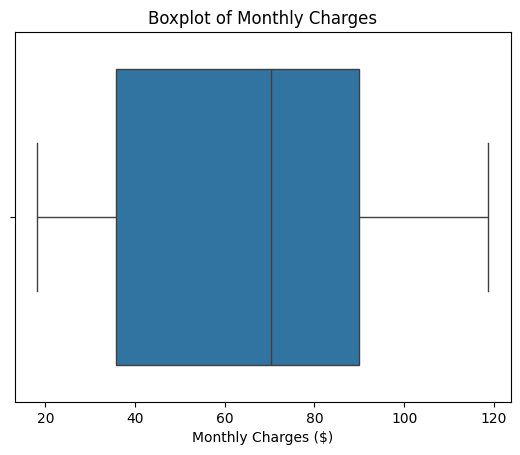

In [29]:
# Create a boxplot for MonthlyCharges
sns.boxplot(x=train_telco_df["MonthlyCharges"])
plt.title("Boxplot of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.show()

All of the values are contained within the whiskers, so there are no outliers in the `MonthlyCharges` feature. This supports our previous analysis of the histogram. We move on to visualizing `TotalCharges` next.

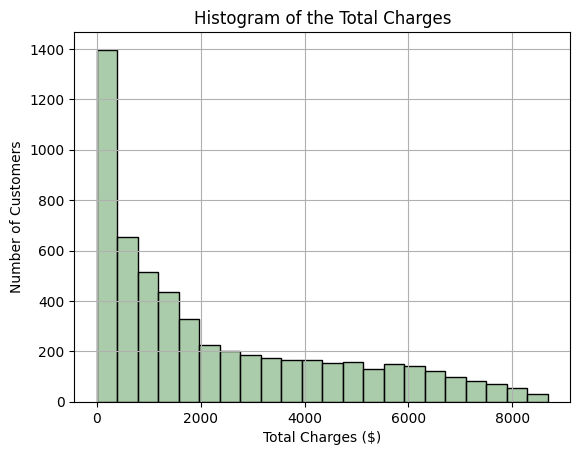

In [30]:
# Visualize the TotalCharges distribution

# Use Freedman-Diaconis rule to determine number of bins
x_axis = "TotalCharges"
iqr = np.percentile(train_telco_df[x_axis], 75) - np.percentile(train_telco_df[x_axis], 25)
bin_width = 2 * iqr / (len(train_telco_df[x_axis]) ** (1/3))
num_bins = int((train_telco_df[x_axis].max() - train_telco_df[x_axis].min()) / bin_width)

# Create the histogram of TotalCharges
sns.histplot(data=train_telco_df, x=x_axis, bins=num_bins, color="darkseagreen")

# Label the histogram
plt.xlabel("Total Charges ($)")
plt.ylabel('Number of Customers')
plt.title('Histogram of the Total Charges')
plt.grid()

# Display plot
plt.show()

The histogram of `TotalCharges` shows a right-skewed distribution, but there do not seem to be outliers. There are no data points that differ significantly from their neighbours; there are no isolated bars, and it is a very steady decline. From a business context, it also makes sense that as more customers have lower `tenure` and lower `MonthlyCharges`, the `TotalCharges` counts would gradually decline as the `TotalCharges` increase. Furthermore, the actual value of a little over 8000 dollars would make sense for customers that have been paying a little over a hundred dollars a month for the full 72 months. Let us show some example rows to determine if these large values are natural.

In [31]:
train_telco_df[train_telco_df["TotalCharges"] > 8000].head(3)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,binned_tenure,binned_MonthlyCharges,binned_TotalCharges
1746,72,116.45,8013.55,True,False,True,False,True,False,True,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No,Long,High,High
608,72,114.55,8306.05,False,True,True,False,False,True,False,...,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),No,Long,High,High
4586,72,118.75,8672.45,True,False,True,False,False,True,False,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No,Long,High,High


We are only including 3 rows in the final notebook for brevity, but that can easily be changed by changing the head value. When analyzing the first 20 rows, we note that all the customers have a `tenure` over 70 months and a `MonthlyCharge` over 100 dollars. This makes sense in the business context, so the larger values are natural.

We want to explicitly recognize that the frequency counts of the higher `TotalCharges` are relatively low. We recognize that naturally occuring values can still be outliers. Thus, even though we asserted these values are naturally occuring, that does not confirm that they are not outliers. However, in addition to the fact that they are naturally occurring, since there is a continuous gradual decline in values, and there are no isolated values, we do not consider them outliers. Another great way to check if they are outliers is to visualize the data with a boxplot. We will now create a boxplot for the `TotalCharges` feature.

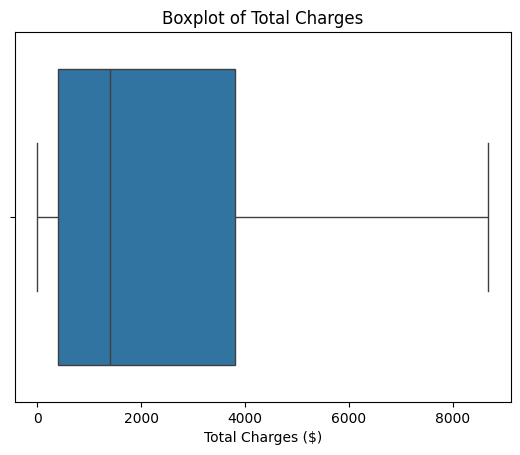

In [32]:
# Create a boxplot for TotalCharges
sns.boxplot(x=train_telco_df["TotalCharges"])
plt.title("Boxplot of Total Charges")
plt.xlabel("Total Charges ($)")
plt.show()

All of the values are contained within the whiskers, so there are no outliers in the `TotalCharges` feature. This supports our previous analysis of the histogram.

##### Outlier Detection Using LOF

In the assignment description, it states that if there are no features with outliers in our dataset, then we should purposefully introduce some so that LOF can detect them. It is important to note that, despite my high-level EDA analysis using histograms and the interquartile range check indicating that there are no outliers, that does not negate the possibility that the LOF algorithm could classify some points as outliers. In particular, since the `TotalCharges` feature is heavily right-skewed, it is possible that LOF would consider some of the higher `TotalCharges` values as outliers. Thus, we will first check if LOF detects outliers in the `TotalCharges` feature before inserting our own artificial outliers.

**References:** <br>
Numpy Array Value Counts: https://stackoverflow.com/questions/10741346/frequency-counts-for-unique-values-in-a-numpy-array <br>
LOF: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

In [33]:
# Detect outliers using LOF

# Store the TotalCharges values in a 2D array
X = train_telco_df[["TotalCharges"]].values

# Run LOF on the TotalCharges values 
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)

# Check if LOF found any outliers (outliers will be marked as -1, and inliers are marked as 1)
unique, counts = np.unique(y_pred, return_counts=True)
np.asarray((unique, counts)).T

array([[  -1,   68],
       [   1, 5566]])

Thus, despite my EDA analysis through histograms and boxplots (IQR analysis), LOF did in fact detect `68` outliers. We discussed this with the professor, and she stated that even if we believe these are natural and not outliers, if LOF detects them as outliers, we should still either remove or impute them. We can then see if their removal had a positive or negative impact on the model at evaluation time, which can be used to confirm or deny our intuition. Thus, we do not need to introduce synthetic outliers, as we can use the `68` outliers detected by LOF. Let us investigate which points were identified as outliers before we make a decision on either removal or imputation.

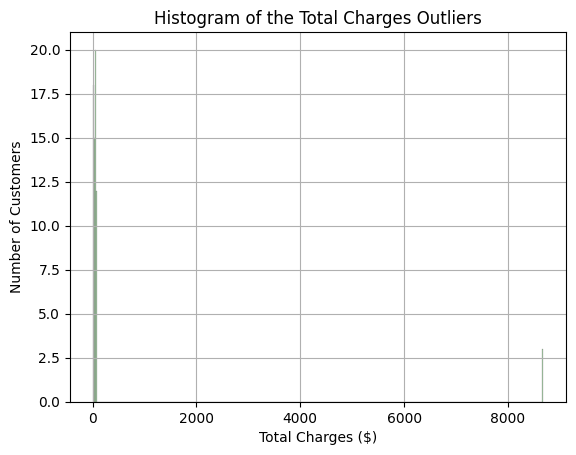

In [34]:
# Visualize the TotalCharges outliers distribution

# Convert the array of -1s and 1s into a boolean mask to filter the rows
total_charges_outlier_mask = y_pred == -1

# Use the mask to save the outlier rows
total_charges_outliers = train_telco_df[total_charges_outlier_mask]

# Use Freedman-Diaconis rule to determine number of bins
x_axis = "TotalCharges"
iqr = np.percentile(total_charges_outliers[x_axis], 75) - np.percentile(total_charges_outliers[x_axis], 25)
bin_width = 2 * iqr / (len(total_charges_outliers[x_axis]) ** (1/3))
num_bins = int((total_charges_outliers[x_axis].max() - total_charges_outliers[x_axis].min()) / bin_width)

# Create the histogram of TotalCharges
sns.histplot(data=total_charges_outliers, x=x_axis, bins=num_bins, color="darkseagreen")

# Label the histogram
plt.xlabel("Total Charges ($)")
plt.ylabel('Number of Customers')
plt.title('Histogram of the Total Charges Outliers')
plt.grid()

# Display plot
plt.show()

As expected, some of the outliers are in fact the large `TotalCharges` values. What is more surprising, however, is that a significant number of the outliers are the lowest `TotalCharges` values. Let us view some examples of exact data points.

In [35]:
# Show some example outlier values of TotalCharges
total_charges_outliers["TotalCharges"]

5514      48.45
4586    8672.45
601       47.70
4487      73.10
4540      20.95
         ...   
180       29.95
2431      47.50
4180      41.85
3942      42.90
4369      66.95
Name: TotalCharges, Length: 68, dtype: float64

It seems as though the outliers are mostly below a value of 100 dollars. 

##### Deciding What to do With Outliers

Ultimately, since the data points are at the extremities (and we know they are natural, real, values), it does not make sense to impute them with a new value. Thus, we will simply remove them.

In [36]:
# Removing the outliers

# Use the mask to save the inliers as a new DataFrame
outliers_removed_train_telco_df = train_telco_df[~total_charges_outlier_mask]

# Verify the length is the expected length of 5566
len(outliers_removed_train_telco_df)

5566

Now, we have successfully removed the outliers from the DataFrame. Now there are two training sets that we will perform feature extraction on:
- `train_telco_df`: The DataFrame with the LOF outliers left in.
- `outliers_removed_train_telco_df`: The DataFrame without the LOF outliers.

### (d) Predictive Analysis: Decision Trees

We explore the `DecisionTreeClassifier` method suggested in `scikit-learn`. As learned in class, the `DecisionTreeClassifier` creates a model that predicts the value of a target feature by learning decision rules from the input features. The function supports three different functions that measure the quality of the split: `gini`, which chooses the split that minimizes the gini impurity, and `entropy` and `log_loss`, which both choose the split that maximizes information gain.

#### Usage
There is an important prerequisite for using the `DecisionTreeClassifier` method; according to the `scikit-learn` docs, **the scikit-learn implementation does not support categorical variables for now.** Thus, we must encode our categorical variables using one-hot encoding to be able to train on them. Thus, we will add an encoding step in our preparation pipeline after binning, and before splitting the data into training and test sets. The original categorical columns will be immediately removed in the test set since they will no longer be used. However, the original categorical columns are used in our EDA, outlier detection, and feature extraction sections, so they will only be removed from the training sets immediately before running the actual `DecisionTreeClassifier` method in `part f` of the assignment.

In terms of precise usage, you first initialize the `DecisionTreeClassifier` with `clf = DecisionTreeClassifier(random_state=0)`. Then, you can perform 4-fold cross-validation with `cross_val_score(clf, telco.data, telco.target, cv=4)`, where `telco.data` holds the input features, and `telco.target` holds the target feature. Scoring metrics can also be passed into `cross_val_score` for validation purposes.

#### Parameters
There are a number of parameters that can be set using the `DecisionTreeClassifier` method. We will provide an overview of the parameters as documented in the `scikit-learn` documentation, then we will specify our chosen baseline setting.
- **criterion:** The function used to evaluate the splits.
    - Default: `gini`
    - Options: `gini`, `entropy`, `log_loss`
- **splitter:** The strategy used to choose the split. The best split (maximizing information gain or minimizing impurity) is the default, but a random reasonable split can be selected as well.
    - Default: `best`
    - Options: `best`, `random`
- **max_depth:** An integer specifying the maximum depth of the decision tree. It can also be `None`, which expands the tree until the leaf nodes are pure, or contain less samples than the specified `min_samples_split`.
    - Default: `None`
    - Options: int, `None`
- **min_samples_split:** The minimum number of samples required in a node for a split.
    - Default: 2
    - Options: int or float
- **min_samples_leaf**: The minimum number of samples required in a leaf. For example, if this is 3, all leaves must have at least 3 samples.
    - Default: 1
    - Options: int or float
- **min_weight_fraction_leaf**: The minimum weighted fraction of the total weights required in a leaf.
    - Default: 0.0
    - Options: float
- **max_features:** The number of features used when deciding on the split.
    - Default: `None` (all features)
    - Options: int, float, `sqrt`, `log2`, `None`
- **random_state:** Controls the randomness. If set to an int, the decision tree training becomes deterministic.
    - Default: `None` (random)
    - Options: int, `RandomState` instance, `None`
- **max_leaf_nodes:** Stop training once `max_leaf_nodes` leaf nodes have been created. Takes the `max_leaf_nodes` "best" leaf nodes.
    - Default: `None`
    - Options: int, `None`
- **min_impurity_decrease:** A split will only occur if it decreases the impurity by at least `min_impurity_decrease`.
    - Default: `0.0`
    - Options: float
- **class_weight:** Specifies how much weight to put on each target class during training.
    - Default: `None` (equal weights)
    - Options: dict, list of dict, `balanced`, `None`
- **ccp_alpha:** Specifies how the tree should be pruned to avoid over-fitting.
    - Default: 0.0
    - Options: non-negative float
- **monotonic_cst:** An array indicating monotonicity constraints on each feature (in other words, specifying if the target increases or decreases in relation to each feature).
    - Default: `None` (no constraints)
    - Options: Array of int of shape (n_features)

For our baseline method, we will use the defaults for each. Our rationale is that even if specifying some of the parameters might improve the model, the baseline is not meant to be optimized for the dataset. It is meant to be a starting point that can be improved on. Thus, it makes sense to simply use the defaults for the baseline model. Optimizations can be made on the parameters through experimentation during our empirical study. We will briefly go over each default value and discuss why it should work for our baseline model, as well as our intuition on how it might influence the results.

- **criterion:** `gini`
    - `gini`, `entropy`, `log_loss`, are all applicable for classification using a decision tree. Thus, using the `gini` default will work perfectly fine on our dataset. According to the `Let's talk about data science blog`, `gini` does not handle unbalanced datasets as well as `entropy`. Since our target is relatively unbalanced (about one quarter `Yes`, three quarters `No`), this is a good reason to use `entropy` instead, but recall that this is our baseline method that is meant to represent an **unoptimized** model. Thus, we will still use the default of `gini`. We can evaluate our intuition that `entropy` is better during the parameter tuning stage of our empirical study.
- **splitter:** `best`
    - The `best` option for `splitter` is pretty standard, and splitting based on the `best` division should cause no problems in our dataset. In a worst case, it could overfit the tree to the training data. We can compare this option to `random` in the parameter tuning stage of our empirical study.
- **max_depth:** `None`
    - Not setting a `max_depth` is not unusual, imposing no issues. It could lead to very large trees, but our dataset is not particulary large so this should not be an issue. 
- **min_samples_split:** 2
    - Splitting whenever there are still multiple values in a node will ensure as many splits are done as possible, which is acceptable. It could lead to overfitting; this can be evaluated when parameter tuning. It can also lead to very large trees, but our dataset is not particulary large so this should not be an issue. 
- **min_samples_leaf**: 1
    - By not enforcing a minimum number of samples in a leaf, we are allowing the tree to grow as much as possible, which is reasonable. It could lead to overfitting; this can be evaluated when parameter tuning. It can also lead to very large trees, but our dataset is not particulary large so this should not be an issue. 
- **min_weight_fraction_leaf**: 0.0
    - By not enforcing a minimum number of weight in a leaf, we are allowing the tree to grow as much as possible, which is reasonable. It could lead to overfitting; this can be evaluated when parameter tuning. It can also lead to very large trees, but our dataset is not particulary large so this should not be an issue. 
- **max_features:** `None` (all features)
    - It is not unusual to use all the features when training a decision tree. This could lead to overfitting, though (especially since some of our features are somewhat redundant).
- **random_state:** 0
    - We are actually not using the default for `random_state`. Since we want our results to be reproducible, we set `random_state` to 0.
- **max_leaf_nodes:** `None`
    - By not enforcing a maximum number of leaf nodes, we are allowing the tree to grow as much as possible, which is reasonable. It could lead to overfitting; this can be evaluated when parameter tuning. It can also lead to very large trees, but our dataset is not particulary large so this should not be an issue.
- **min_impurity_decrease:** `0.0`
    - By not enforcing a minimum impurity on a split, we are allowing the tree to grow as much as possible, which is reasonable. It could lead to overfitting; this can be evaluated when parameter tuning. It can also lead to very large trees, but our dataset is not particulary large so this should not be an issue.
- **class_weight:** `None` (equal weights)
    - In theory, it would actually be better to used `balanced` since our dataset does not have an even split of the target classes. However, no weights on the class is standard, and we reiterate that we are meant to determine a starting point, not an optimal set of parameters. This can be adjusted in our empirical study.
- **ccp_alpha:** 0.0
    - By default, no pruning is performed, so we are allowing the tree to grow as much as possible, which is reasonable. It could lead to overfitting; this can be evaluated when parameter tuning. It can also lead to very large trees, but our dataset is not particulary large so this should not be an issue.
- **monotonic_cst:** `None` (no constraints)
    - We have no indication of any monotonic constraints that would benefit the model, so even if we were trying to optimize our baseline model, we would use `None` for this feature.
 
So, the actual code used for our baseline method will look like `DecisionTreeClassifier(random_state=0)`, as the rest of the parameters are defaults.


**References:** <br>
Decision Tree Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html <br>
Decision Trees: https://scikit-learn.org/stable/modules/tree.html <br>
Categorical Support: https://medium.com/@dyahayusekarkinasih/categorical-feature-in-decision-tree-classifier-3ad0c42c6dcc <br>
Gini Versus Entropy: https://ekamperi.github.io/machine%20learning/2021/04/13/gini-index-vs-entropy-decision-trees.html

### (e) Feature Engineering (TODO)

average_monthly_charge = total charge / tenure
- shows their average monthly charge

monthly charge / average_monthly_charge
- shows how their current rate compares to their historic rate
- something below 1 means their charge went down, so they should be happy and less likely to leave
- something above 1 means their charge went up, so they should be sad and more likely to leave

In [37]:
# Create a copy of the df that will contain the engineered features
engineered_telco_df = cleaned_telco_df.copy()

# Feature 1: Ratio comparing the user's current monthly charge to their historic average monthly charge

def compute_current_to_historic_monthly_charge_ratio(row):
    if row["tenure"] == 0:
        return 1
    return row["MonthlyCharges"]/(row["TotalCharges"] / row["tenure"])
    

engineered_telco_df["currentToHistoricMonthlyChargeRatio"] = engineered_telco_df.apply(
    lambda row: compute_current_to_historic_monthly_charge_ratio(row),
    axis = 1
)

engineered_telco_df.head(3)

engineered_telco_df["currentToHistoricMonthlyChargeRatio"].max()

np.float64(1.4506283662477557)

### (f) Empirical Study (TODO)

### (g) Results Analysis (TODO)

## Conclusion (TODO)

## References (TODO)